In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

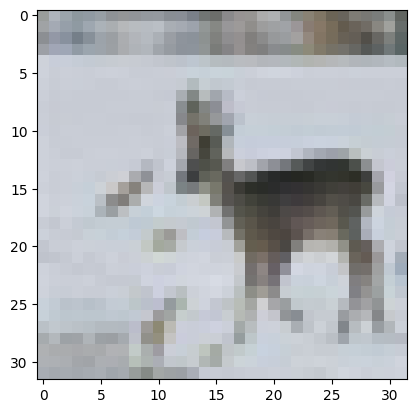

In [ ]:
plt.imshow(X_train[20])


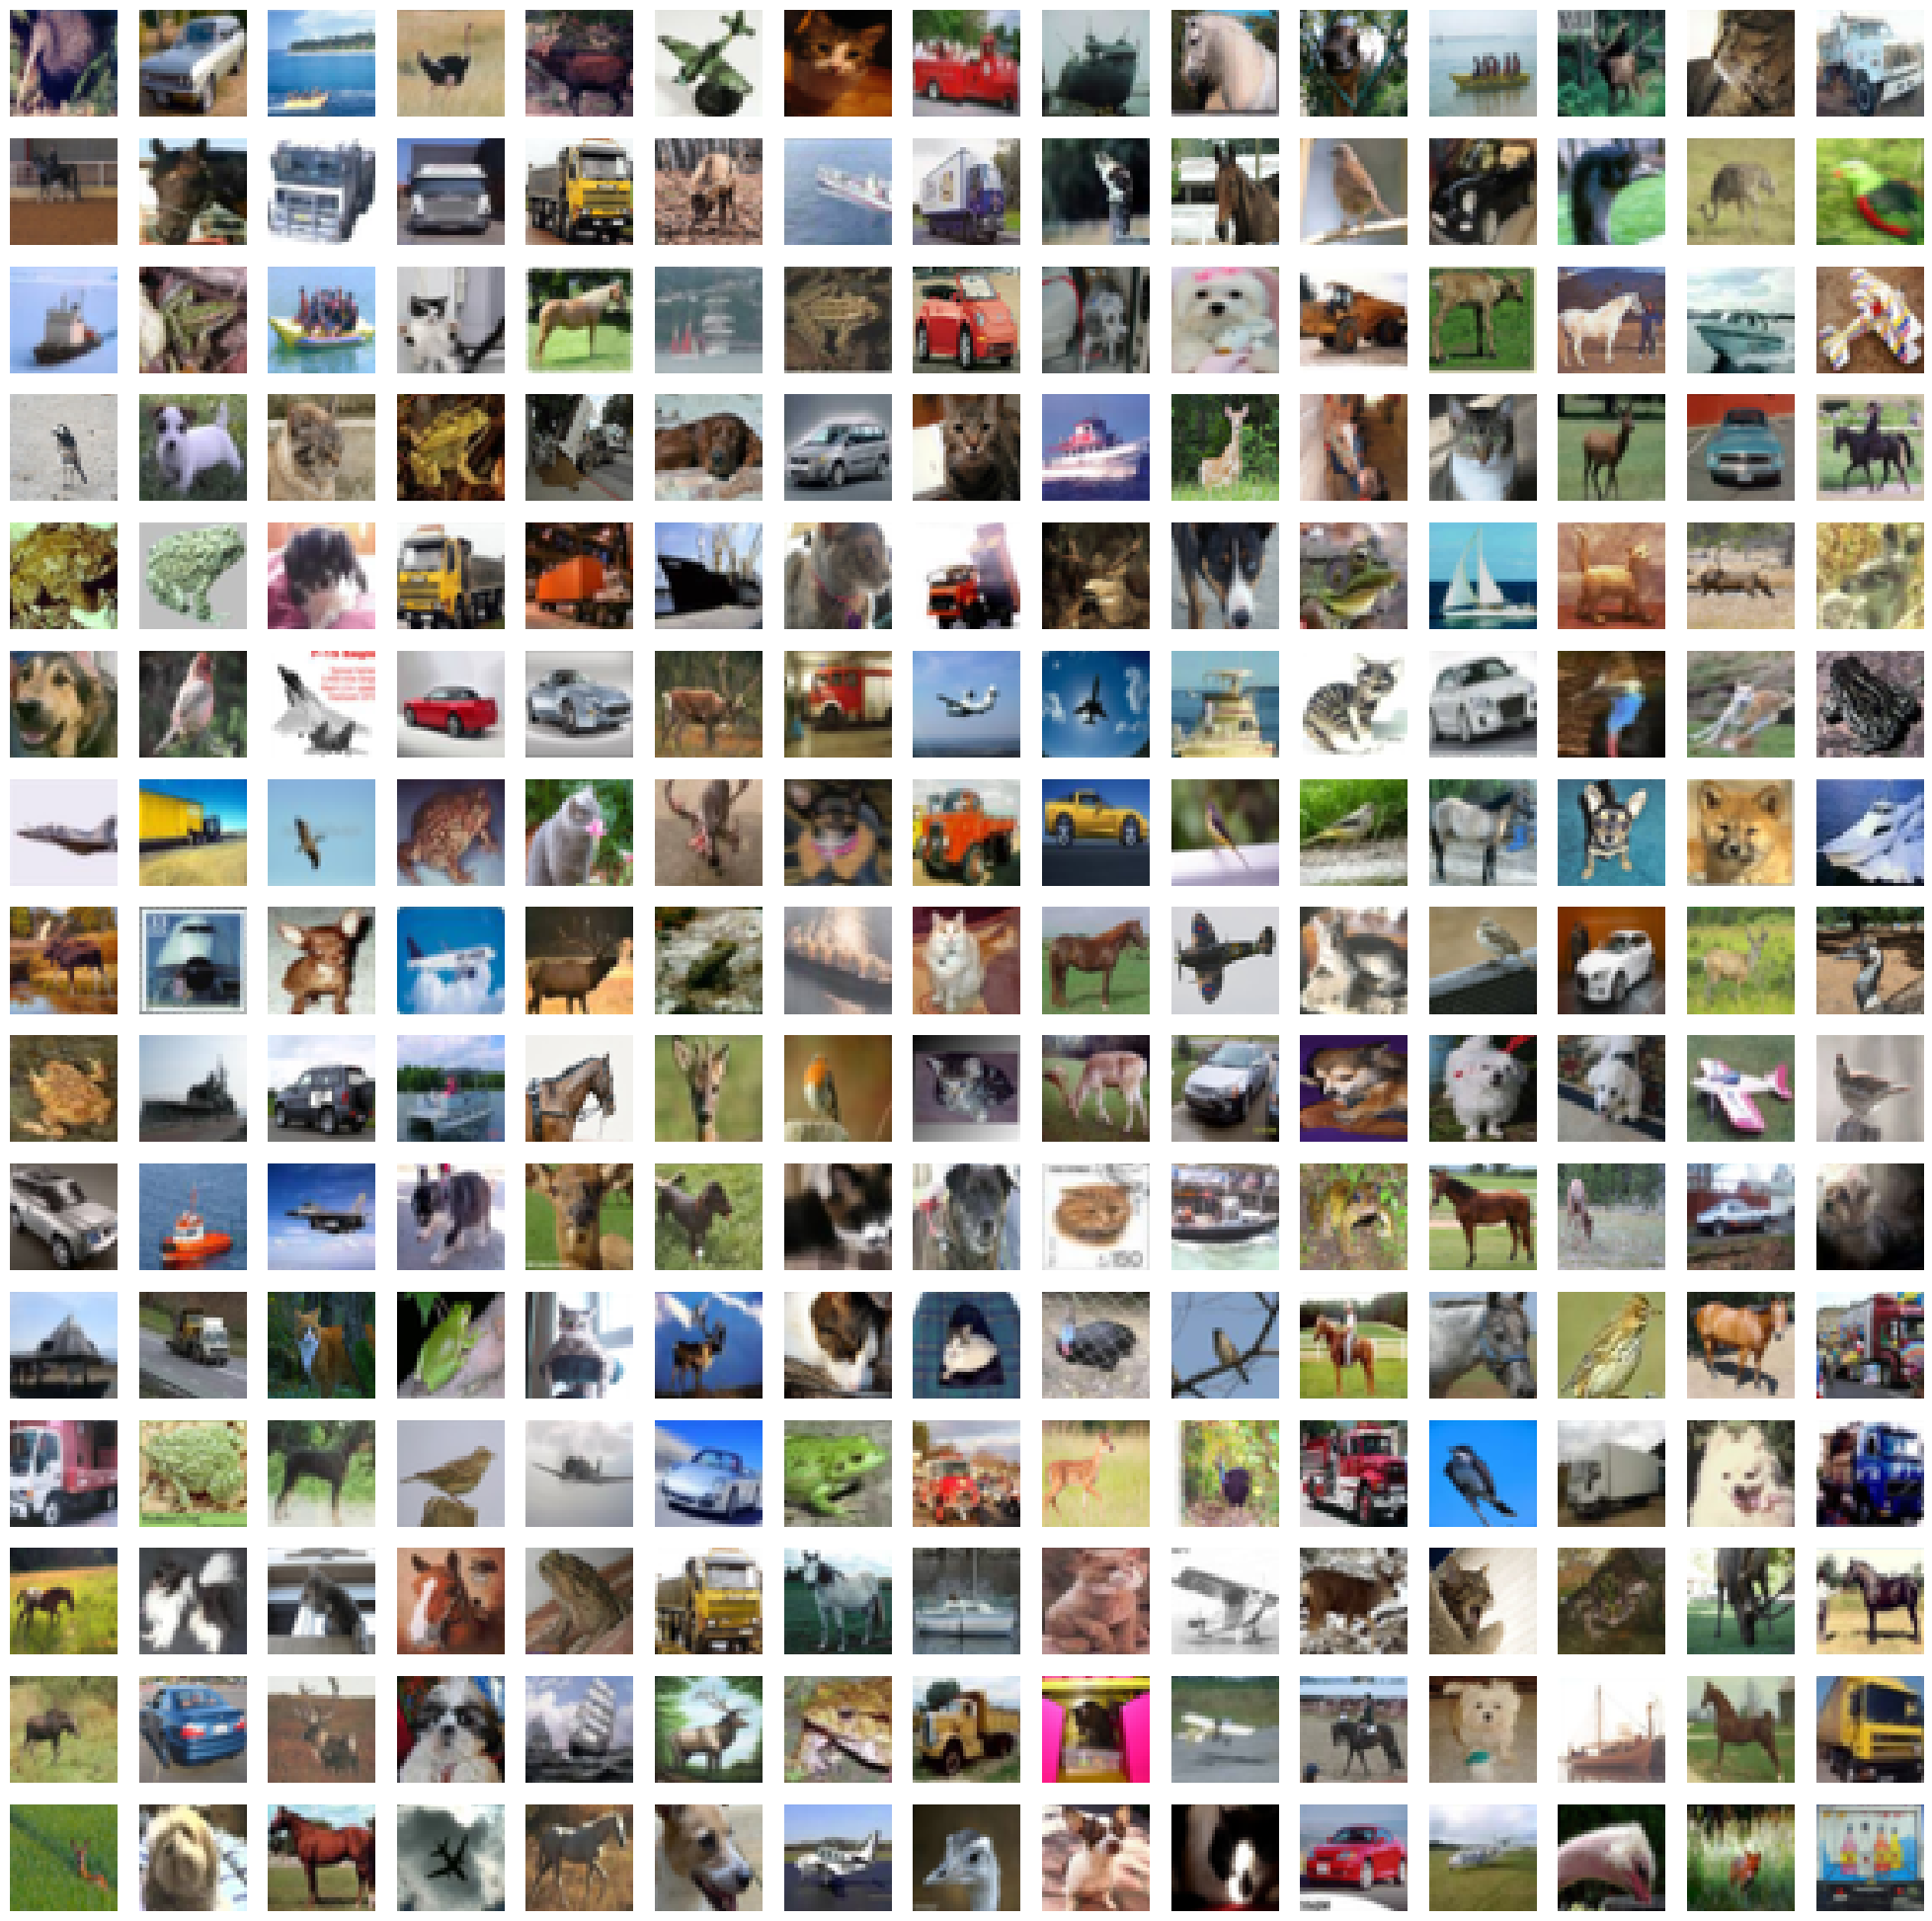

In [ ]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')

# Steps for Basic CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the CNN model architecture
model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# Layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10




In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with training and validation sets
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 184ms/step - accuracy: 0.2445 - loss: 1.9966 - val_accuracy: 0.5077 - val_loss: 1.3344
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 134s 171ms/step - accuracy: 0.5005 - loss: 1.3849 - val_accuracy: 0.5810 - val_loss: 1.1551
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 177ms/step - accuracy: 0.5885 - loss: 1.1664 - val_accuracy: 0.6462 - val_loss: 0.9998
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 178ms/step - accuracy: 0.6463 - loss: 1.0152 - val_accuracy: 0.6957 - val_loss: 0.8719
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 177ms/step - accuracy: 0.6888 - loss: 0.9045 - val_accuracy: 0.7008 - val_loss: 0.8729
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 176ms/step - accuracy: 0.7109 - loss: 0.8418 - val_accuracy: 0.7231 - val_loss: 0.8125
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 172ms/step - accuracy: 0.7362 - loss: 0.7729 - val_accuracy: 0.7310 - val_loss: 0.7980
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 108s 173ms/step - accuracy: 0.7563 -

In [ ]:
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a function to create the CNN model
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

# Define optimizers
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Nesterov Momentum": SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adagrad": Adagrad(learning_rate=0.01),
    "Adadelta": Adadelta(learning_rate=1.0),
    "RMSProp": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001)
}

# Dictionary to store history of each optimizer
histories = {}

# Train the model with each optimizer
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer")

    # Create a new instance of the model
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_val, y_val)
    )

    # Save the training history
    histories[name] = history

# Now, you can analyze the histories dictionary for each optimizer's performance



Training with SGD optimizer
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 87s 173ms/step - accuracy: 0.1173 - loss: 2.2999 - val_accuracy: 0.2381 - val_loss: 2.2404
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 175ms/step - accuracy: 0.1805 - loss: 2.2212 - val_accuracy: 0.2775 - val_loss: 2.0534
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 143s 178ms/step - accuracy: 0.2297 - loss: 2.0835 - val_accuracy: 0.3108 - val_loss: 1.9345
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 177ms/step - accuracy: 0.2610 - loss: 1.9945 - val_accuracy: 0.3299 - val_loss: 1.9078
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 176ms/step - accuracy: 0.2984 - loss: 1.9032 - val_accuracy: 0.3985 - val_loss: 1.7150
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 172ms/step - accuracy: 0.3331 - loss: 1.8033 - val_accuracy: 0.4134 - val_loss: 1.6422
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 145s 178ms/step - accuracy: 0.3604 - loss: 1.7287 - val_accuracy: 0.4384 - val_loss: 1.5689
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 173

#Grid Search on Baseline CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import ParameterGrid, train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the function to create the CNN model
def create_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the model
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the model
    model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],  # Specify optimizer classes instead of instances
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],  # Set a higher epoch count to allow early stopping
    'learning_rate': [0.001]  # Optionally add learning rate as a hyperparameter
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search
best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")

    # Train model with the current set of parameters
    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.7268999814987183
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7239000201225281
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.710099995136261
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7407000064849854
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.6434999704360962
Testing para

#RandomizedSearchCV

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import random

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the function to create the CNN model
def create_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the model
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the model
    model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define parameter distributions for random search
param_dist = {
    'optimizer_class': [SGD, Adam],  # Optimizer classes
    'dropout_rate': np.linspace(0.2, 0.5, 4),  # Dropout rates between 0.2 and 0.5
    'batch_size': [32, 64, 128],  # Batch sizes
    'epochs': [20],  # Higher epoch count to allow early stopping to intervene
    'learning_rate': [0.001, 0.01]  # Different learning rates for optimizers
}

# Randomly sample combinations of parameters
n_iter = 10  # Number of random samples to test
param_samples = []
for _ in range(n_iter):
    params = {k: random.choice(v) for k, v in param_dist.items()}
    param_samples.append(params)

# Perform random search
best_score = 0
best_params = None
for params in param_samples:
    print(f"Testing parameters: {params}")

    # Train model with the current set of parameters
    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>, 'dropout_rate': 0.2, 'batch_size': 128, 'epochs': 20, 'learning_rate': 0.001}
Validation Accuracy: 0.5533000230789185
Testing parameters: {'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>, 'dropout_rate': 0.3, 'batch_size': 128, 'epochs': 20, 'learning_rate': 0.001}
Validation Accuracy: 0.7501000165939331
Testing parameters: {'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>, 'dropout_rate': 0.4, 'batch_size': 32, 'epochs': 20, 'learning_rate': 0.01}
Validation Accuracy: 0.10400000214576721
Testing parameters: {'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>, 'dropout_rate': 0.4, 'batch_size': 128, 'epochs': 20, 'learning_rate': 0.001}
Validation Accuracy: 0.7305999994277954
Testing parameters: {'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>, 'dropout_rate': 0.2, 'batch_size': 128, 'epochs': 20, 'learning_rate': 0.001}
Validation Accuracy: 0.5544000267982483
Testi

#Grid Search with image flipping

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training (with horizontal flip)
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Define the function to create the CNN model
def create_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the model
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the model
    model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model using the data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],  # Specify optimizer classes instead of instances
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],  # Set a higher epoch count to allow early stopping
    'learning_rate': [0.001]  # Optionally add learning rate as a hyperparameter
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search
best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")

    # Train model with the current set of parameters
    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Validation Accuracy: 0.6292999982833862
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7307999730110168
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.5859000086784363
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7085999846458435
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.5706999897956848
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validatio

#Resnet Model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import ParameterGrid, train_test_split
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a function to create the ResNet-18 model
def create_resnet18_model(optimizer='adam', dropout_rate=0.5):
    # Load ResNet50 architecture and remove the top layers
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights=None,  # No pretrained weights; initialize with zero
        input_shape=(32, 32, 3)
    )

    # Add custom layers for CIFAR-10
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the model
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the model
    model = create_resnet18_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],  # Specify optimizer classes instead of instances
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],  # Set a higher epoch count to allow early stopping
    'learning_rate': [0.001]  # Optionally add learning rate as a hyperparameter
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search
best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")

    # Train model with the current set of parameters
    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 21ms/step - accuracy: 0.2426 - loss: 2.9345 - val_accuracy: 0.3343 - val_loss: 9.9607
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3747 - loss: 2.4084 - val_accuracy: 0.3928 - val_loss: 1.7893
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3697 - loss: 2.3775 - val_accuracy: 0.2923 - val_loss: 6.1360
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3438 - loss: 2.4048 - val_accuracy: 0.3775 - val_loss: 3.3733
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3411 - loss: 2.3957 - val_accuracy: 0.3522 - val_loss: 2.0916
Validation Accuracy: 0.3522000014781952
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimize

#Resnet with Image Augmentation

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training
train_datagen = ImageDataGenerator(
    horizontal_flip=True,  # Random horizontal flipping
    rotation_range=15,     # Random rotations
    width_shift_range=0.1, # Random horizontal shifts
    height_shift_range=0.1 # Random vertical shifts
)

# Define a function to create the ResNet-18 model
def create_resnet18_model(optimizer='adam', dropout_rate=0.5):
    # Load ResNet50 architecture and remove the top layers
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights=None,  # No pretrained weights; initialize from scratch
        input_shape=(32, 32, 3)
    )

    # Add custom layers for CIFAR-10
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the model
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the model
    model = create_resnet18_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Create the training generator with data augmentation
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

    # Train the model using the data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],  # Specify optimizer classes instead of instances
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],  # Set a higher epoch count to allow early stopping
    'learning_rate': [0.001]  # Optionally add learning rate as a hyperparameter
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search
best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")

    # Train model with the current set of parameters
    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 27ms/step - accuracy: 0.2178 - loss: 2.9292 - val_accuracy: 0.3637 - val_loss: 1.8216
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3637 - val_loss: 1.8216
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.3249 - loss: 2.4548 - val_accuracy: 0.3975 - val_loss: 4.8815
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3975 - val_loss: 4.8815
Validation Accuracy: 0.39750000834465027
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.2285 - loss: 2.8970 - val_accurac

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.3619 - loss: 1.7585 - val_accuracy: 0.4935 - val_loss: 1.4397
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4935 - val_loss: 1.4397
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.5424 - loss: 1.2721 - val_accuracy: 0.5426 - val_loss: 1.3516
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5426 - val_loss: 1.3516
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6170 - loss: 1.0684 - val_accuracy: 0.6483 - val_loss: 1.0252
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6483 - val_loss: 1.0252
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.6686 - loss: 0.9327 - val_accuracy: 0.6963 - val_loss: 0.8620
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6963 - val_loss: 0.8620
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - acc

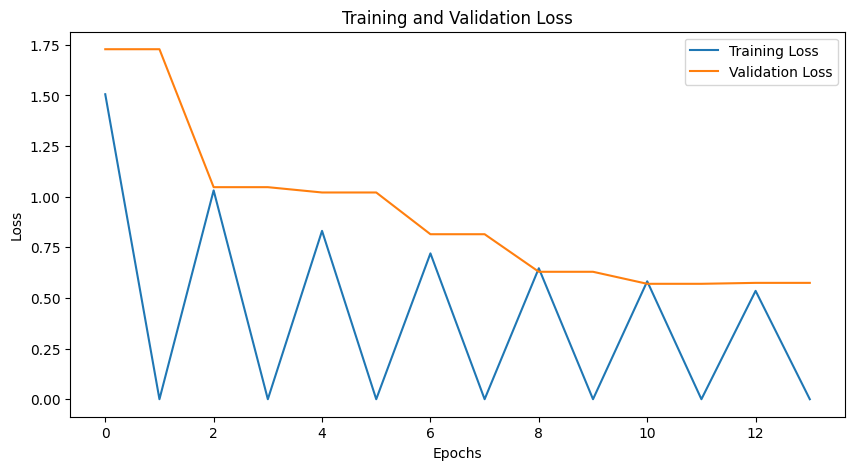

Best Parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.01, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Best Score: 0.8091999888420105


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split, ParameterGrid
import numpy as np
import matplotlib.pyplot as plt

# Residual block for ResNet
def residual_block(x, filters, stride=1):
    shortcut = x
    x = Conv2D(filters, (3, 3), strides=stride, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, (3, 3), strides=1, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)

    # Adjust shortcut to match filter size if needed
    if stride != 1:
        shortcut = Conv2D(filters, (1, 1), strides=stride, padding='same', use_bias=False)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

# Function to build the ResNet-18 model
def create_resnet18_model(input_shape=(32, 32, 3), num_classes=10, optimizer='adam', dropout_rate=0.5):
    inputs = Input(shape=input_shape)

    # Initial layers
    x = Conv2D(64, (3, 3), strides=1, padding='same', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    x = residual_block(x, 128, stride=2)
    x = residual_block(x, 128)

    x = residual_block(x, 256, stride=2)
    x = residual_block(x, 256)

    x = residual_block(x, 512, stride=2)
    x = residual_block(x, 512)

    # Global pooling and dense layer
    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, x)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Custom function to train and evaluate the model
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    K.clear_session()

    # Initialize optimizer
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create ResNet-18 model
    model = create_resnet18_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Create the training generator with data augmentation
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

    # Train the model using the data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    return history

# Define the parameter grid for grid search with additional learning rates
param_grid = {
    'optimizer_class': [SGD, Adam],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],
    'learning_rate': [0.001, 0.01, 0.0001, 0.0005]
}

param_grid = list(ParameterGrid(param_grid))

# Perform grid search
best_score = 0
best_params = None
best_history = None
for params in param_grid:
    print(f"Testing parameters: {params}")
    history = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    val_accuracy = history.history['val_accuracy'][-1]
    print(f"Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_score:
        best_score = val_accuracy
        best_params = params
        best_history = history

# Plot the training and validation loss for the best model
plt.figure(figsize=(10, 5))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


#Alexnet with hyper parameter

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training (with horizontal flip)
train_datagen = ImageDataGenerator(horizontal_flip=True)

# Define a function to create the AlexNet model
def create_alexnet_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential([
        Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(dropout_rate),

        Dense(4096, activation='relu'),
        Dropout(dropout_rate),

        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the AlexNet model
def train_alexnet_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the AlexNet model
    model = create_alexnet_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Create the training generator with data augmentation
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

    # Train the model using the data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],  # Specify optimizer classes instead of instances
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],  # Set a higher epoch count to allow early stopping
    'learning_rate': [0.001,0.01]  # Optionally add learning rate as a hyperparameter
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search
best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")

    # Train AlexNet model with the current set of parameters
    score = train_alexnet_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.3888 - loss: 1.7856 - val_accuracy: 0.4373 - val_loss: 1.6743
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4373 - val_loss: 1.6743
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6055 - loss: 1.1062 - val_accuracy: 0.6303 - val_loss: 1.0358
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6303 - val_loss: 1.0358
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6944 - loss: 0.8670 - val_accuracy: 0.6654 - val_loss: 0.9360
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6654 - val_loss: 0.9360
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7449 - loss: 0.7281 - val_accuracy: 0.6925 - val_loss: 0.8757
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6925 - val_loss: 0.8757
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step

#MobileNet with Hyperparameter

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training
train_datagen = ImageDataGenerator(
    horizontal_flip=True  # Apply horizontal flip augmentation
)

# Define a function to create the MobileNet model
def create_mobilenet_model(optimizer='adam', dropout_rate=0.5):
    # Load MobileNet architecture without the top layers
    base_model = MobileNet(
        include_top=False,
        weights=None,  # No pretrained weights; initialize from scratch
        input_shape=(32, 32, 3)
    )

    # Add custom layers for CIFAR-10
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the model
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the MobileNet model
    model = create_mobilenet_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Create the training generator with data augmentation
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

    # Train the model using the data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],  # Specify optimizer classes instead of instances
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],  # Set a higher epoch count to allow early stopping
    'learning_rate': [0.001, 0.0001]  # Test two different learning rates
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search
best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")

    # Train model with the current set of parameters
    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.2065 - loss: 2.2913 - val_accuracy: 0.3531 - val_loss: 1.8055
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3531 - val_loss: 1.8055
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3536 - loss: 1.7744 - val_accuracy: 0.4073 - val_loss: 1.6204
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4073 - val_loss: 1.6204
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4225 - loss: 1.5913 - val_accuracy: 0.4718 - val_loss: 1.4700
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 680us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4718 - val_loss: 1.4700
Epoch 7/20
1250/1250 ━━━━━━━━━━━

#Final AlexNet Model with best parameters

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training
train_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Define the AlexNet model with the best configuration
def create_alexnet_model():
    model = Sequential([
        Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.3),  # Best dropout rate
        Dense(4096, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    # Compile with best configuration optimizer
    optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model



    # Instantiate the model
model = create_alexnet_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using data augmentation
history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.3595 - loss: 1.8784 - val_accuracy: 0.5769 - val_loss: 1.1899
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5769 - val_loss: 1.1899
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.5519 - loss: 1.2508 - val_accuracy: 0.6387 - val_loss: 1.0214
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6387 - val_loss: 1.0214
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.6151 - loss: 1.0725 - val_accuracy: 0.6205 - val_loss: 1.0572
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6205 - val_loss: 1.0572
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6321 - loss: 1.0279
Test Accuracy: 0.6279000043869019


#Final ResNet Model with best parameters

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)  # Best batch size

# Define the ResNet-18 model with the best configuration
def create_resnet18_final_model():
    # Load ResNet50 architecture and remove the top layers
    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights=None,  # No pretrained weights; initialize from scratch
        input_shape=(32, 32, 3)
    )

    # Add custom layers for CIFAR-10
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)  # Best dropout rate
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model with the best optimizer configuration
    optimizer = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)  # Best learning rate and optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the model
resnet18_final_model = create_resnet18_final_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using data augmentation with the best parameters
history = resnet18_final_model.fit(
    train_generator,
    epochs=20,  # Best epoch count
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = resnet18_final_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 72s 29ms/step - accuracy: 0.1390 - loss: 7.1509 - val_accuracy: 0.1764 - val_loss: 28.5746
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1764 - val_loss: 28.5746
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.2254 - loss: 4.3574 - val_accuracy: 0.3161 - val_loss: 7.2907
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3161 - val_loss: 7.2907
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.2883 - loss: 2.9019 - val_accuracy: 0.3560 - val_loss: 3.9216
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3560 - val_loss: 3.9216
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.3350 - loss: 2.2194 - val_accuracy: 0.3826 - val_loss: 2.4094
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3826 - val_loss: 2.4094
Epoch 9/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accu

#CNN Final Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)  # Best batch size

# Define the final CNN model based on best parameters
def create_cnn_final_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.3),  # Best dropout rate
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])

    # Compile the model with the best optimizer configuration
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the model
cnn_final_model = create_cnn_final_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using the data generator
history = cnn_final_model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = cnn_final_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.2766 - loss: 1.9212 - val_accuracy: 0.5451 - val_loss: 1.2498
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5451 - val_loss: 1.2498
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5452 - loss: 1.2666 - val_accuracy: 0.6263 - val_loss: 1.0733
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6263 - val_loss: 1.0733
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6222 - loss: 1.0712 - val_accuracy: 0.6645 - val_loss: 0.9589
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6645 - val_loss: 0.9589
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6732 - loss: 0.9443 - val_accuracy: 0.6939 - val_loss: 0.8665
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.0000

#Final Mobile Net Model

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)  # Best batch size

# Define the final MobileNet model based on best parameters
def create_mobilenet_final_model():
    # Load MobileNet architecture without the top layers
    base_model = MobileNet(
        include_top=False,
        weights=None,  # No pretrained weights; initialize from scratch
        input_shape=(32, 32, 3)
    )

    # Add custom layers for CIFAR-10
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)  # Best dropout rate
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model with the best optimizer configuration
    optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the model
mobilenet_final_model = create_mobilenet_final_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using the data generator
history = mobilenet_final_model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = mobilenet_final_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.1967 - loss: 2.3125 - val_accuracy: 0.3471 - val_loss: 1.7974
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 662us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3471 - val_loss: 1.7974
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3577 - loss: 1.7683 - val_accuracy: 0.4296 - val_loss: 1.5743
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4296 - val_loss: 1.5743
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4164 - loss: 1.6037 - val_accuracy: 0.4533 - val_loss: 1.4968
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4533 - val_loss: 1.4968
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4620 - loss: 1.4981 - val_accuracy: 0.4874 - val_loss: 1.4104
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - a

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)  # Best batch size

# Define the final MobileNet model based on best parameters
def create_mobilenet_final_model():
    # Load MobileNet architecture without the top layers
    base_model = MobileNet(
        include_top=False,
        weights=None,  # No pretrained weights; initialize from scratch
        input_shape=(32, 32, 3)
    )

    # Add custom layers for CIFAR-10
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)  # Best dropout rate
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model with the best optimizer configuration
    optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the model
mobilenet_final_model = create_mobilenet_final_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using the data generator
history = mobilenet_final_model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = mobilenet_final_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.2185 - loss: 2.2554 - val_accuracy: 0.3672 - val_loss: 1.7502
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 672us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3672 - val_loss: 1.7502
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3802 - loss: 1.7277 - val_accuracy: 0.4436 - val_loss: 1.5199
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4436 - val_loss: 1.5199
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4418 - loss: 1.5644 - val_accuracy: 0.4779 - val_loss: 1.4612
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4779 - val_loss: 1.4612
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4690 - loss: 1.4686 - val_accuracy: 0.5056 - val_loss: 1.3746
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - a

#Evaluation Metrics


Evaluating CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

CNN Metrics:
Accuracy: 0.7505
Precision: 0.7489731708123746
Recall: 0.7505000000000001
F1 Score: 0.7484560890909856
ROC AUC Score: 0.9660061222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.79      1000
           1       0.87      0.87      0.87      1000
           2       0.68      0.58      0.63      1000
           3       0.60      0.54      0.57      1000
           4       0.68      0.71      0.69      1000
           5       0.66      0.65      0.65      1000
           6       0.75      0.86      0.80      1000
           7       0.80      0.80      0.80      1000
           8       0.89      0.82      0.85      1000
           9       0.83      0.84      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



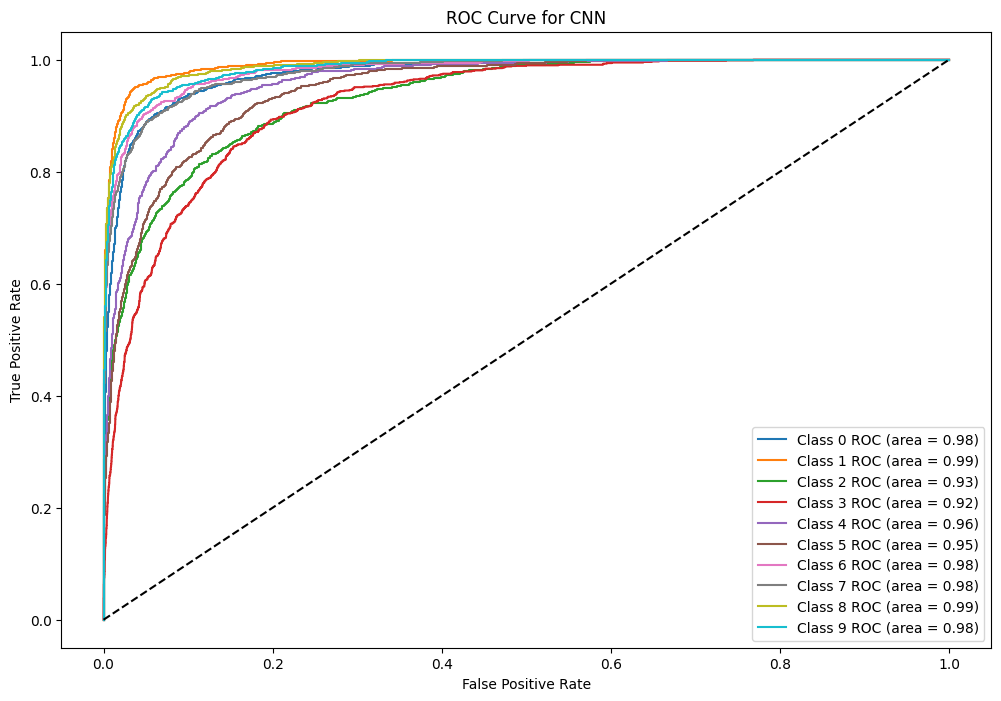


Evaluating ResNet-18...
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step

ResNet-18 Metrics:
Accuracy: 0.3638
Precision: 0.3895195473188672
Recall: 0.36379999999999996
F1 Score: 0.32207136182987295
ROC AUC Score: 0.8293320055555556

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.23      0.30      1000
           1       0.32      0.78      0.45      1000
           2       0.51      0.02      0.04      1000
           3       0.27      0.11      0.16      1000
           4       0.37      0.28      0.32      1000
           5       0.41      0.34      0.37      1000
           6       0.36      0.64      0.46      1000
           7       0.40      0.46      0.42      1000
           8       0.36      0.64      0.46      1000
           9       0.44      0.16      0.24      1000

    accuracy                           0.36     10000
   macro avg       0.39      0.36      0.32     10000
weighted avg       0.39      0.36      0.32  

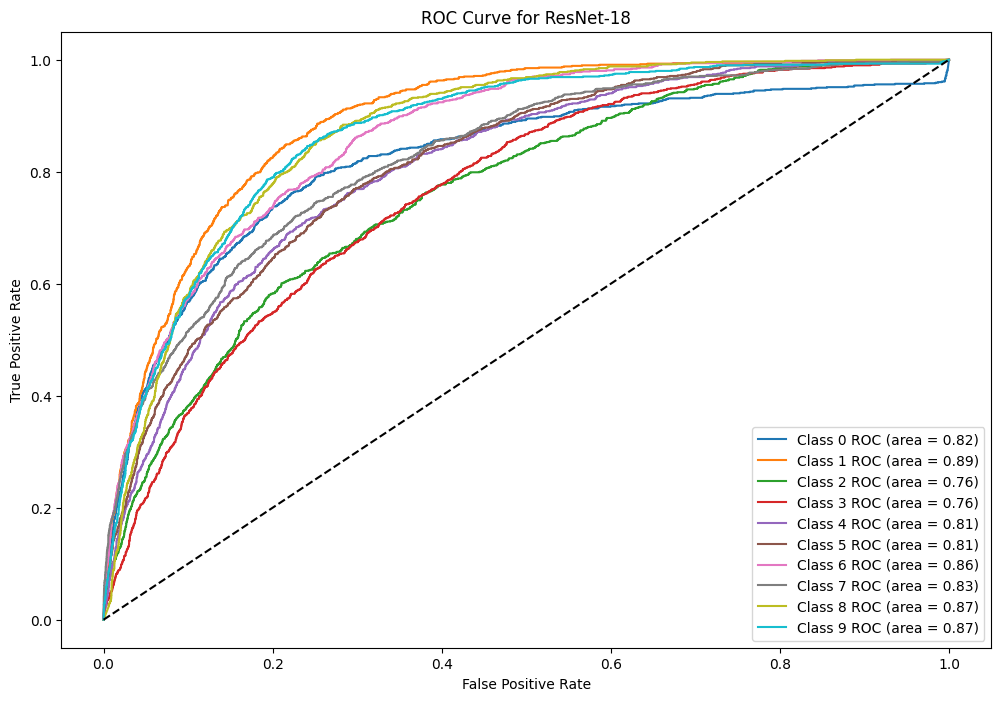


Evaluating AlexNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

AlexNet Metrics:
Accuracy: 0.6279
Precision: 0.6290188679244821
Recall: 0.6279000000000001
F1 Score: 0.6218905656636957
ROC AUC Score: 0.9389224

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.62      0.67      1000
           1       0.73      0.76      0.74      1000
           2       0.57      0.47      0.51      1000
           3       0.47      0.38      0.42      1000
           4       0.63      0.42      0.50      1000
           5       0.51      0.60      0.55      1000
           6       0.70      0.69      0.69      1000
           7       0.57      0.78      0.66      1000
           8       0.74      0.77      0.76      1000
           9       0.64      0.79      0.71      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.62     10000
weighted avg       0.63      0.63      0.62     10000



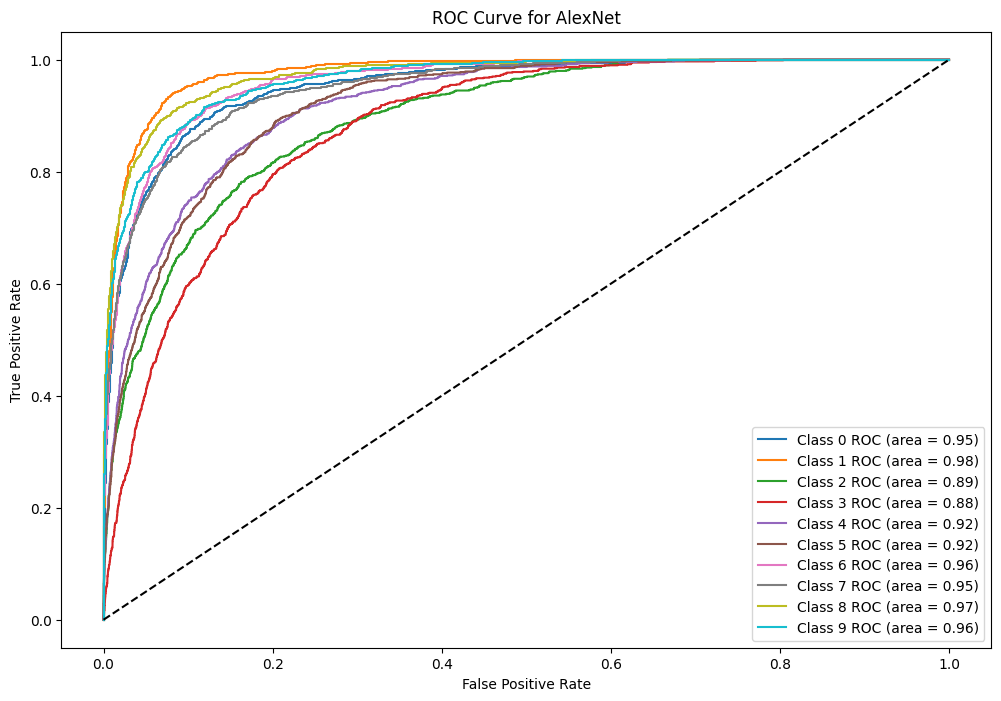


Evaluating MobileNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step

MobileNet Metrics:
Accuracy: 0.6
Precision: 0.5914513757281649
Recall: 0.6
F1 Score: 0.5915508087268389
ROC AUC Score: 0.9235647777777777

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.67      0.63      1000
           1       0.66      0.81      0.73      1000
           2       0.50      0.48      0.49      1000
           3       0.46      0.28      0.35      1000
           4       0.51      0.50      0.50      1000
           5       0.51      0.49      0.50      1000
           6       0.63      0.69      0.66      1000
           7       0.65      0.68      0.66      1000
           8       0.69      0.79      0.73      1000
           9       0.70      0.62      0.66      1000

    accuracy                           0.60     10000
   macro avg       0.59      0.60      0.59     10000
weighted avg       0.59      0.60      0.59     10000



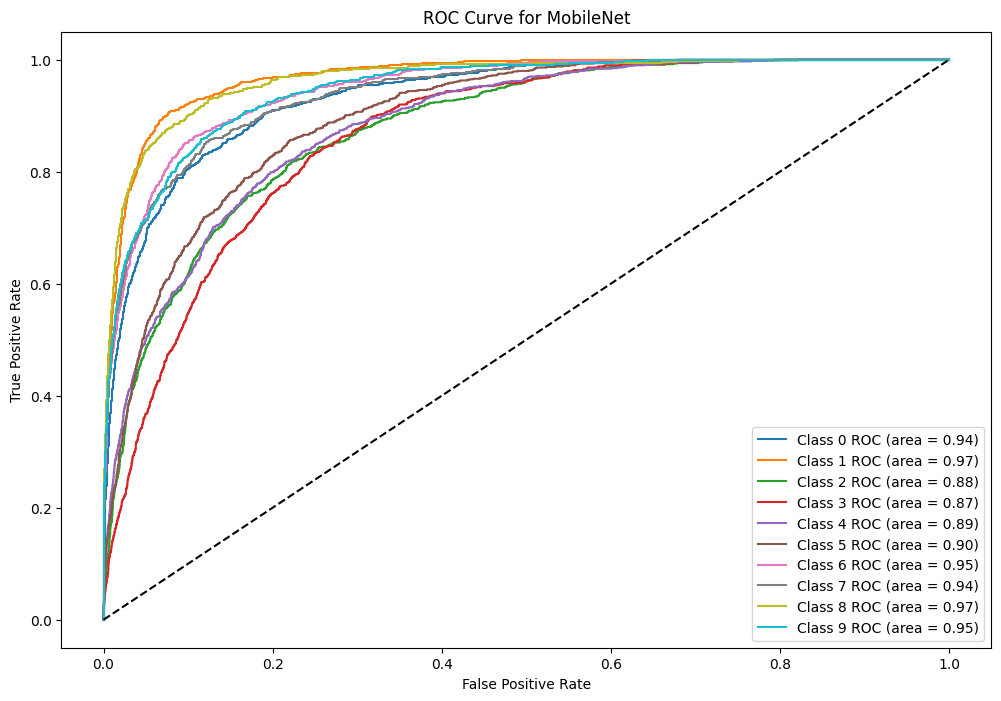

In [18]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Assuming the final trained models are:
# cnn_final_model, resnet18_final_model, alexnet_final_model, mobilenet_final_model

# List of models for evaluation
models = {
    "CNN": cnn_final_model,
    "ResNet-18": resnet18_final_model,
    "AlexNet": model,
    "MobileNet": mobilenet_final_model
}

# Prepare true labels and one-hot encoded binary form for ROC AUC
y_true = np.argmax(y_test, axis=1)
y_test_bin = to_categorical(y_true, 10)  # Binary representation of test labels for ROC AUC

# Loop through each model, make predictions, and calculate metrics
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Predict probabilities and classes
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    classification_rep = classification_report(y_true, y_pred)
    roc_auc = roc_auc_score(y_test_bin, y_pred_probs, multi_class='ovr')

    # Print the metrics
    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("\nClassification Report:\n", classification_rep)

    # Plot ROC Curve for each class
    fig, c_ax = plt.subplots(1, 1, figsize=(12, 8))
    for i in range(10):  # CIFAR-10 has 10 classes
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
        class_auc = auc(fpr, tpr)
        c_ax.plot(fpr, tpr, label=f'Class {i} ROC (area = {class_auc:.2f})')

    # Plot ROC curve settings
    c_ax.plot([0, 1], [0, 1], 'k--')
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    c_ax.set_title(f'ROC Curve for {model_name}')
    c_ax.legend(loc="lower right")
    plt.show()



Generating confusion matrix for CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


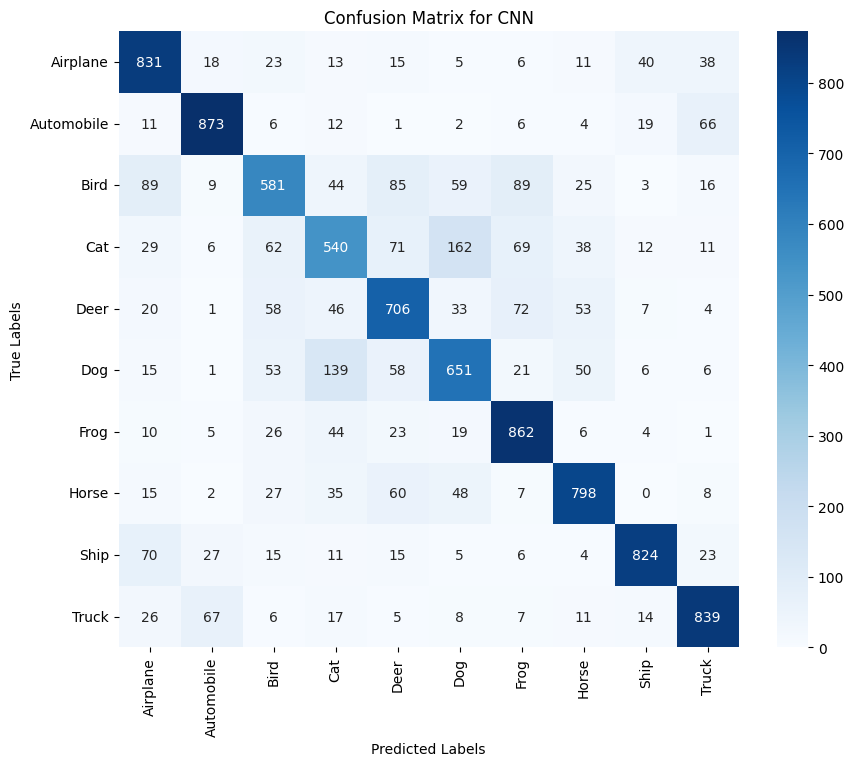


Generating confusion matrix for ResNet-18...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


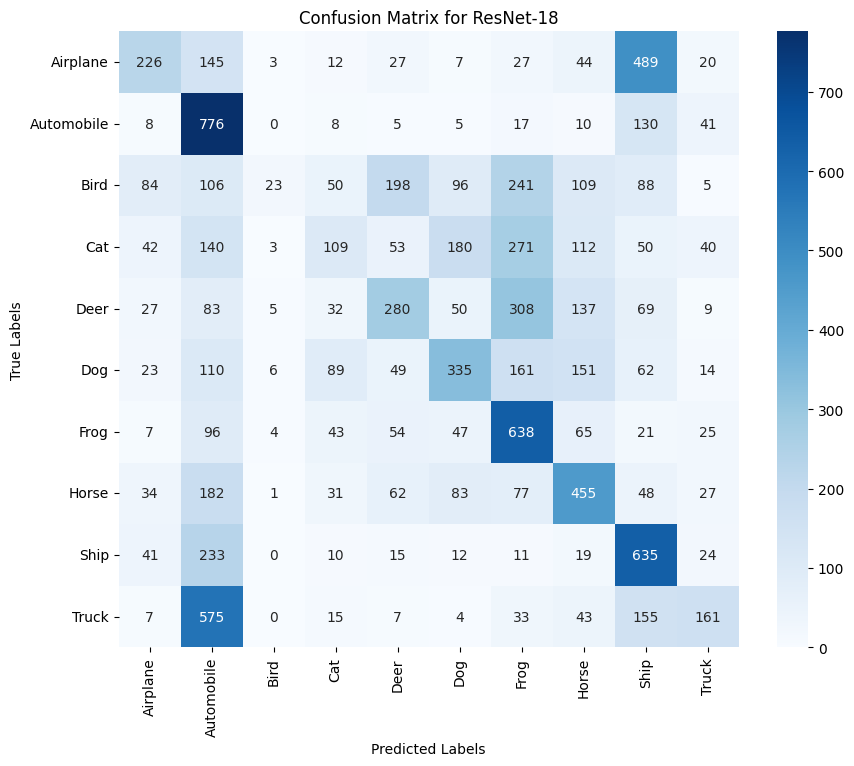


Generating confusion matrix for AlexNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


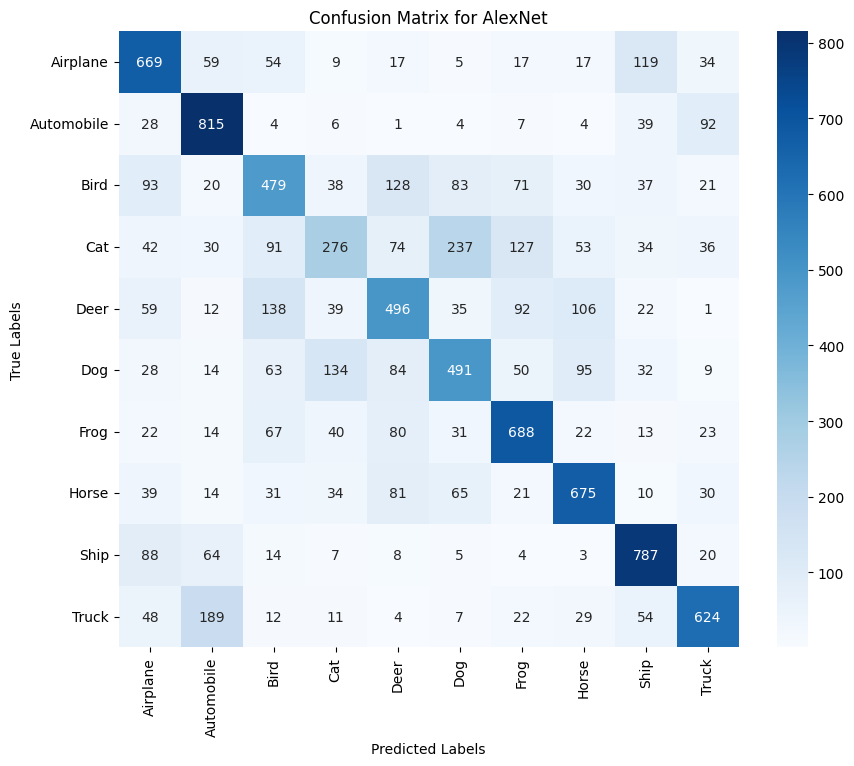


Generating confusion matrix for MobileNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


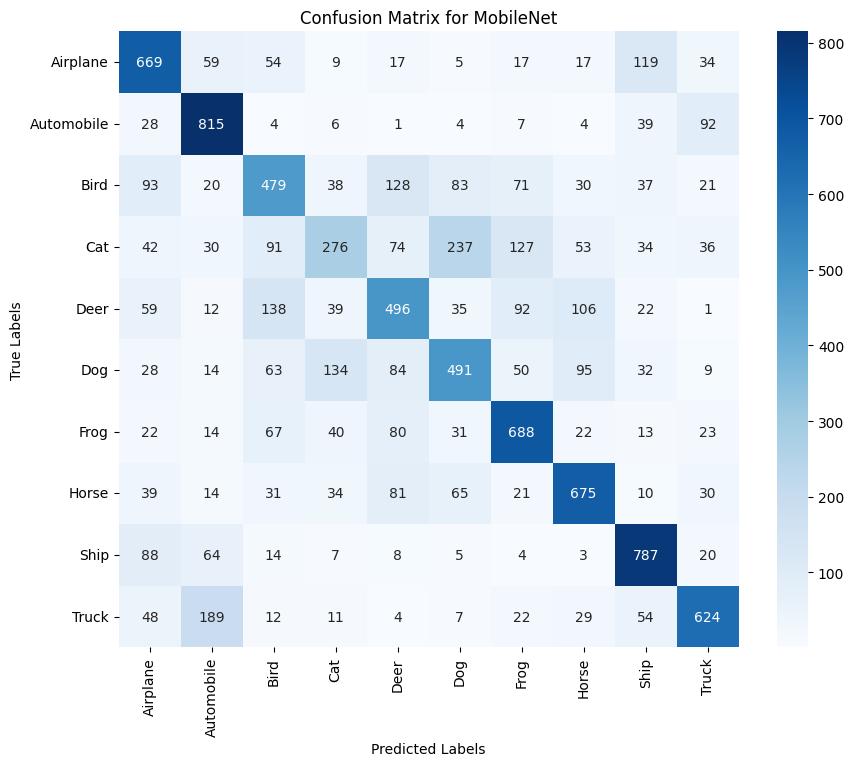

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have these final trained models:
# cnn_final_model, resnet18_final_model, alexnet_final_model, mobilenet_final_model

# List of models for evaluation
models = {
    "CNN": cnn_final_model,
    "ResNet-18": resnet18_final_model,
    "AlexNet": model,
    "MobileNet": mobilenet_final_model
}

# Actual CIFAR-10 class names
class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

# Loop through each model, make predictions, and plot confusion matrix
for model_name, model in models.items():
    print(f"\nGenerating confusion matrix for {model_name}...")

    # Predict class labels for the test set
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
